In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [15]:
df=pd.read_csv("marketbasket.csv")
df

,Transaction_ID,Items
0,1,"Pasta, Milk, Eggs"
1,2,"Carrots, Bananas, Tomato Sauce"
2,3,"Tomato Sauce, Carrots, Cheese"
3,4,"Butter, Rice, Potatoes"
4,5,"Tea, Apples, Pasta, Orange Juice, Bread, Eggs"
...,...,...
95,96,"Rice, Sugar, Cheese"
96,97,"Potatoes, Carrots, Bread, Apples"
97,98,"Eggs, Sugar, Bread, Cereal, Yogurt"
98,99,"Apples, Butter, Tomato Sauce, Yogurt"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction_ID  100 non-null    int64 
 1   Items           100 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [9]:
item_counts = df['Items'].str.split(',').explode().value_counts()
print("Most Frequently Purchased Items:")
print(item_counts.head())

Most Frequently Purchased Items:
Items
Yogurt          20
Pasta           20
Cereal          17
Milk            17
Orange Juice    17
Name: count, dtype: int64


In [17]:
transactions = df['Items'].apply(lambda x: x.split(','))
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [19]:
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support         itemsets
0      0.12        ( Apples)
1      0.13       ( Bananas)
2      0.12         ( Bread)
3      0.15        ( Butter)
4      0.15       ( Carrots)
5      0.17        ( Cereal)
6      0.17        ( Cheese)
7      0.15       ( Chicken)
8      0.17        ( Coffee)
9      0.14          ( Eggs)
10     0.17          ( Milk)
11     0.15        ( Onions)
12     0.17  ( Orange Juice)
13     0.20         ( Pasta)
14     0.10      ( Potatoes)
15     0.15          ( Rice)
16     0.13         ( Sugar)
17     0.15           ( Tea)
18     0.17  ( Tomato Sauce)
19     0.20        ( Yogurt)
20     0.10           (Eggs)
21     0.10            (Tea)


In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="confidence", ascending=False)
print("Top Association Rules:")
print(rules.head())


Top Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


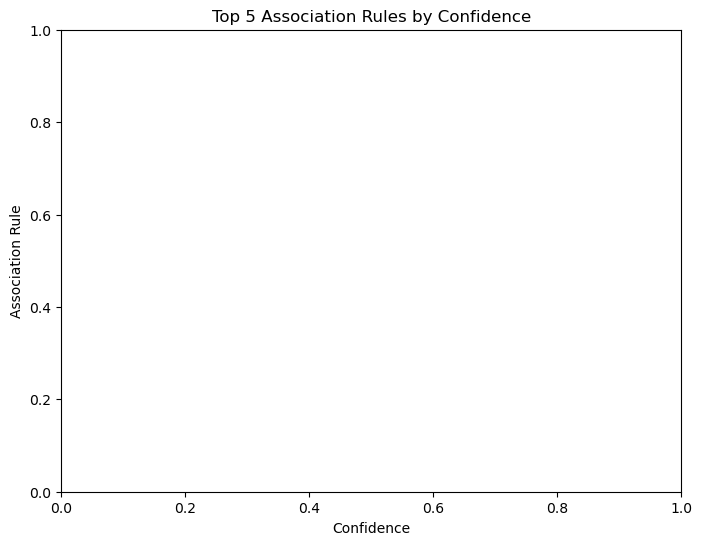

In [31]:


plt.figure(figsize=(8, 6))
sns.barplot(x=rules['confidence'], y=rules['antecedents'].astype(str) + " -> " + rules['consequents'].astype(str))
plt.xlabel("Confidence")
plt.ylabel("Association Rule")
plt.title("Top 5 Association Rules by Confidence")
plt.show()